# <font color = 'darkblue' > K means clustering
<a href = "https://www.youtube.com/watch?v=esmzYhuFnds">MIT Clustering Lecture </a> 

In [21]:
from sklearn.cluster import KMeans
import numpy as np
# number of clusters that the algorithm must find 
k = 3 
from sklearn.datasets import load_iris
data = load_iris()
X = data['data']
y = data['target']
kmeans = KMeans(n_clusters = k) 
y_pred = kmeans.fit_predict(X)

* Each instance is assigned to one of the clusters. In the context of clustering, an instance's label is the index of the cluster that this instance gets assigned to by the algorithm; 

In [22]:
y_pred = kmeans.fit_predict(X)

In [23]:
kmeans.cluster_centers_ 
# we got the three centroid vectors

array([[6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097]])

In [24]:
# we can easily assign new instances to the cluster whose centroid is closest 

In [25]:
X_new = np.array([5.6,2.3,2.3,1.3]).reshape(1,-1)
kmeans.predict(X_new) 
# we got the prediction as 1 : test data belongs to the 1st cluster 

array([1])

Instead of assigning each instance to a single cluster, which is called **hard clustering**, it can be useful to jsut give each instance a score per cluster; this is called **soft clustering**. For example, the score can be the distance between the instance and the centroid, or conversely it can be a **similarity score (affinity)** such as the **Gaussian Radial Basis Funtion** In the Kmeans class , the transform() method measures the distance from each instance to every centroid; 

In [26]:
kmeans.transform(X_new)
# represents that the x_new data is located at distance 2.16 from the first cluster, 
# 1.85 from the second cluster and so on . 

array([[3.82147852, 1.85428692, 2.16630737]])

If you have a high-dimensional dataset and you transform it this way, you end up with a k-dimensional dataset; this can be a very efficient non-linear dimensionality reduction technique. 

## <font color= 'darkblue '> The K-Means Algorithm 
We start by placing centroids randomly ( by picking k instances at random and using their locations as centroids). 

The computational compolexity of the algorithm is generally linear with regards to the number of instances m, the number of clusters k and the number of dimensions n. However, this is only true when the data has a clustering structure. If it does not, then in the worst case scenario the complexity can incrase exponentially with the number of instances. In practice, however this rarely happens, and k menas is gnerally one of the fastest clustering algorithm. 

Unfortunately although the algorithm is guaranteed to converge, it may not converge to the right solution( it may converge to a local optimum); this depends on the centroid initialization. 

In [27]:
initial_clusters = np.array([
    [5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
    [5.006     , 3.428     , 1.462     , 0.246     ],
    [6.85      , 3.07368421, 5.74210526, 2.07105263]
])
kmeans = KMeans(n_clusters = 3, init = initial_clusters, n_init = 1)

In [28]:
kmeans.fit(X) # after fitting lets check the inertia_
kmeans.inertia_

78.851441426146

In [29]:
kmeans.score(X)

-78.85144142614602

How we measure the performance of clusters. It is called the models's inertia: this is the mean sqaured distance between each instance and its closest centroid. 

## <font color = "darkblue"> What is kmeans ++ 

Instead of choosing initial cluster centers randomly, choose them smarter!
* randomly choose one of the observations to be a cluster center. 
* for each observation x, determine d(x) where d(x) denotes the minimal distance from x to a current cluster center. 
* choose next cluster center from the data points, with probability of making an observation x a cluster center proportional to d(x)**2
* repeat 2 and 3 until you have chosen the right number of clusters

KMeans class actually uses this initialization method by default. If you want to force it to use the original  method then you can set the init hyperparameter  to "random". You will rarely need to do this. 

## <font color = "darkblue"> MiniBatch KMeans Clustering 

Instead of using the full dataset at each iteration, the algorithm is capable of using mini-batches, moving the centroids just slightly at each iteration. This speeds up the algorithm typically by a factor of 3 or 4 and makes it possible to cluster huge datasets that do not fit in memory. Scikit-Learn implements this algorithm in the MiniBatchKMeans class. 

In [30]:
from sklearn.cluster import MiniBatchKMeans
minibatch_kmeans = MiniBatchKMeans(n_clusters=5,batch_size = 2048)
minibatch_kmeans.fit(X)

MiniBatchKMeans(batch_size=2048, n_clusters=5)

## <font color = "darkblue"> Selecting the optimal number of clusters using elbow rule

As we can see, the inertia drops very quickly as we increase k up to 4, but then it decreases much more slowly as we keep increasing k. This curve has roughly the shape of an arm, and there is an elbow at k=4 so if we did not know better, it would be a good choice; any lower value would be dramatic, while any higher value would not help much, and we might just be splitting perfectly good clusters in half for no reason. 

 * In Elbow method, we compute the WCSS(the summ of sqaured distance between each point and the centroid in a cluster). When we plot the WCSS(within cluster sum of squares) with the k value, the plot looks like an elbow. As the number of clusters increases, the WCSS value will start to decrease.WCSS value is largest when k=1. When we analyze the graph we can see that the graph will rapidly change at a point and thus creating an elbow shape. From this point, the graph starts to move almost parallel to the x-axis. The k value corresponding to this point is the optimal k vlaue or an optimal number of clusters.

Text(0, 0.5, 'WCSS')

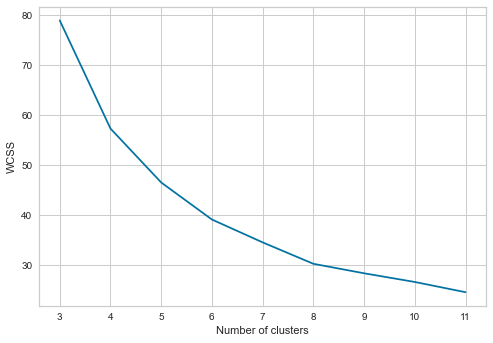

In [38]:
wcss = [] 
for i in range(3, 12): 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X) 
    wcss.append(kmeans.inertia_)
import matplotlib.pyplot as plt
plt.plot(range(3,12), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

## <font color = "darkblue"> Silhouette Score 

A more precise approach ( but more computationally expensive ) is to use the silhouette score, which is the mean silhouette coefficient over all the instances. An instance's silhouette coefficient is equal to (b-a)/max(a,b) where a is the mean distances to the other instances in the same cluster ( intra-cluster distance) and b is the mean nearest-cluster distance, that is the mean distance to the instances of the next closest cluster. 
* The silhouette coefficient can vary between -1 and +1: a coefficient close to +1 means that the instance is well inside its own cluster and far from other clusters, while a coefficient close to 0 means that it is close to a cluster boundary, and finally a coefficient close to -1 means that the instance may have been assigned to the wrong cluster. 
 * Intuitively, silhouette score determines whether there are large gaps between each sample and all other samples within the same cluster or across different clusters. 

In [14]:
from sklearn.metrics import silhouette_score
silhouette_score(X,kmeans.labels_)

0.5528190123564091

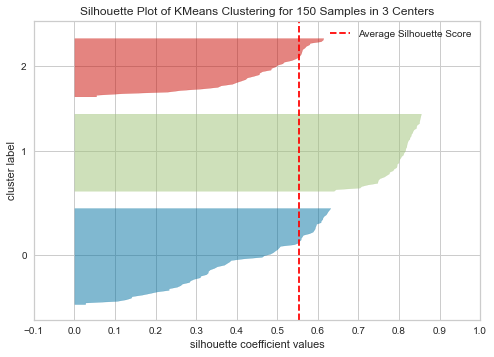

SilhouetteVisualizer(ax=<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 150 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>,
                     colors='yellowbrick',
                     estimator=KMeans(init=array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]]),
                                      n_clusters=3, n_init=1))

In [19]:
from sklearn.metrics import silhouette_samples
sample_silhouette_scores = silhouette_samples(X, kmeans.labels_)
from yellowbrick.cluster import silhouette_visualizer
silhouette_visualizer(kmeans, X, colors='yellowbrick')

## <font color = "darkblue"> Limits and Merits of kmeans 

It is necessary to run the algorithm several times to avoid sub-optimal solutions, plus we need to specify the number of clusters, which can be quite a hassle. Moreover kmeans does not behave very well when the clusters, have varying sizes, different densities, or non-spherical shapes. So depending on the data, different clustering algorithms may perform better. For example, on these types of elliptical clusters Gaussian mixture models work great. 

* it is good to scale the input features before we run kmeans,
* sensitive to outliers 
* sensitive to the initialization process.
* we need to provide the number of clusters as an input variable to the algorithm 
----------------------------------------------------
* easy to understand and implement 
* guranteed convergence 

## Questions 

##### Is feature Scaling required for the k means algorithm? 
kmeans typically needs to have some form of normalization done on the datasets to work properly since it is sensitive to both the mean and variance of the datasets.
##### Why do we prefer euclidean distance over manhattan distance in kmeans 
Euclidean distance is preferred over Manhattan distance since Manhattan distance calculates distance only vertically or horizontally due to which it has dimension restrictions.

On the contrary, Euclidean distance can be used in any space to calculate the distances between the data points. Since in K means algorithm the data points can be present in any dimension, so Euclidean distance is a more suitable option.

#### Optimization Function for the Kmeans
The objective of the K-Means algorithm is to find k number of centroids from C1,C2, ... CN, which minimized the within cluster sum of sqaures. 
#### Ways of avoid the problem of initializatoin sensitivity
It is a smart centroid initialization tenchnique. The convergence is faster in KMeans++ 
#### Convergence 
when the algorithm reaches the global or local minima, the centroids wont change significantly. The points stay in the same cluster ie. the algorithm has converged at the minima
#### Curse of dimensionality in kmeans 
A key component of K means is that the distance-based computations are directly impacted by a large number of dimensions since the distances between a data point and its nearest and farthest neighbours can become equidistant in high dimension thereby resulting in reduced accuracy of distance-based analysis tools.

#### Complexity 
k*n*d (lesser than 0(n2)